<a href="https://colab.research.google.com/github/Menatalla-Haggag/ITBLs/blob/main/Activity3_questions_Menatalla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = blue size = 6> **Activity #3 (5 marks)**


<font color = green size = 5> **Activity: Air Quality Analysis in NYC**

# Objective:
- **Objective:**  
The goal of this assignment is to analyze air quality data collected from low-cost sensors mounted on moving vehicles in New York City. Using the concepts learned in the chapters on Sampling and Empirical Distributions , Testing Hypotheses , and Estimation , you will perform statistical analysis to estimate pollution levels, test hypotheses about differences in pollution across neighborhoods, and construct confidence intervals for key parameters.

You are provided with a `Datascience` `Table` named `joined_table`, which contains air quality readings (`pm10`) and their corresponding administrative divisions (neighborhoods) in NYC. The table has been preprocessed and joined with neighborhood boundaries using geospatial operations. Your task is to perform all subsequent tasks using the `Datascience` Table abstraction as taught in class.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [ ]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [ ]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [ ]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-5-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [ ]:
#merged_data.dtypes

In [ ]:
pollution_data = merged_data[['pm10','neighborhood']]

In [ ]:
pollution_data.shape[0]

118495

In [ ]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [ ]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [ ]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [ ]:
pollution_data['pm10'].min()

0.0

In [ ]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [ ]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [ ]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook.total of 5 marks . Use the Table abstraction.

# Tasks

## <font color = blue size  = 5>**Task 1: Sampling and Empirical Distribution (1 Mark)**

**Task Description:**

- Randomly sample 10% of the rows from the joined_table without replacement.
- Compute the mean pm10 value for this sample.
- Create an empirical histogram of the pm10 values from the sampled data using 10 bins.
- Comment on the shape of the histogram and compare it to the distribution of the full dataset.

<font color = red size= 5> attention</font>

remove pm10 values that are unreasonably high (above 300 µg/m³)

In [ ]:
joined_table = joined_table.where('pm10', are.below(300))

In [ ]:
len(joined_table)

2

In [ ]:
joined_table.num_rows

117356

In [ ]:
# Randomly sample 10% of the rows from the table without replacement using .sample()

sampled_table = joined_table.sample(joined_table.num_rows * 10//100, with_replacement = False)
sampled_table

pm10,neighborhood
1.26,Fordham
2.4,Longwood
0.2,Hunts Point
9.53,Hunts Point
0.07,Bronx Park
10.27,Fordham
80.8,Van Nest
13.33,Longwood
0.25,Longwood
0.77,Longwood


In [ ]:
# Calculate the mean pm25 level for the sampled data

print('mean pm10 = ', np.mean(sampled_table.column('pm10')))

mean pm10 =  15.713775032


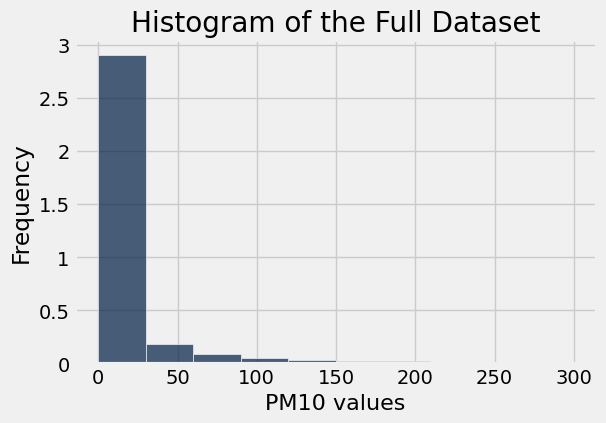

In [ ]:
joined_table.select('pm10').hist(bins=10)
plt.title('Histogram of the Full Dataset')
plt.xlabel('PM10 values')
plt.ylabel('Frequency')
plt.show()

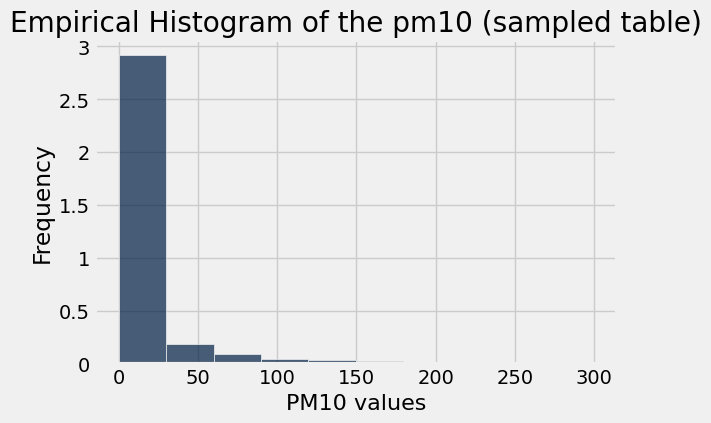

In [ ]:
# Create an empirical histogram of the pm10 values from the sampled data using 10 bins

sampled_table.select('pm10').hist(bins=10)
plt.title('Empirical Histogram of the pm10 (sampled table)')
plt.xlabel('PM10 values')
plt.ylabel('Frequency')
plt.show()

The histogram of the sampled data closely matches that of the full dataset, both showing a right-skewed distribution. Most PM10 values are concentrated at the lower end, with few higher values. This indicates that the sample is representative of the full dataset’s distribution.

## <font color = blue size  = 5> **Task 2: Estimation and Confidence Intervals (1 Mark)**


**Task Description:**
- Use the bootstrap method to estimate the median pm10 value for the entire dataset.
- Generate 5,000 bootstrap samples and compute the median for each sample.
- Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.
- Visualize the results by drawing an `empirical histogram` of the bootstrapped medians and overlaying the confidence interval on the horizontal axis.
- Report the confidence interval and interpret what it means in the context of air quality.

In [ ]:
# Use the bootstrap method to estimate the median pm10 value for the entire dataset.

def one_bootstrap_median():
    resampled_table = sampled_table.sample()
    bootstrapped_median = percentile(50, resampled_table.column('pm10'))
    return bootstrapped_median

In [ ]:
# Generate 5,000 bootstrap samples and compute the median for each sample.

num_repetitions = 5000
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append (bstrap_medians, one_bootstrap_median())

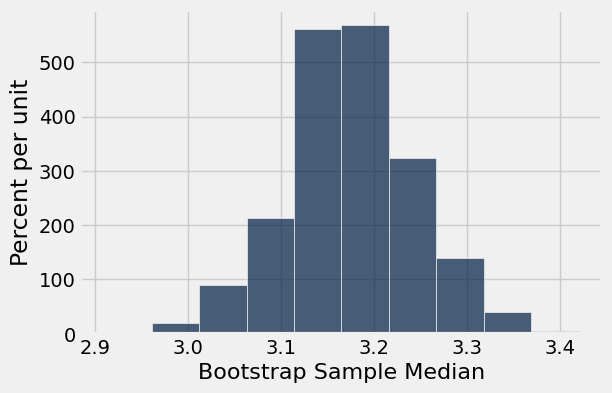

In [ ]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)
resampled_medians.hist(bins = 10)

In [ ]:
# Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.

left = percentile(2.5, bstrap_medians)
left

3.04

In [ ]:
right = percentile(97.5, bstrap_medians)
right

3.3100000000000001

In [ ]:
pop_median = percentile(50, joined_table.column('pm10'))
pop_median

3.1400000000000001

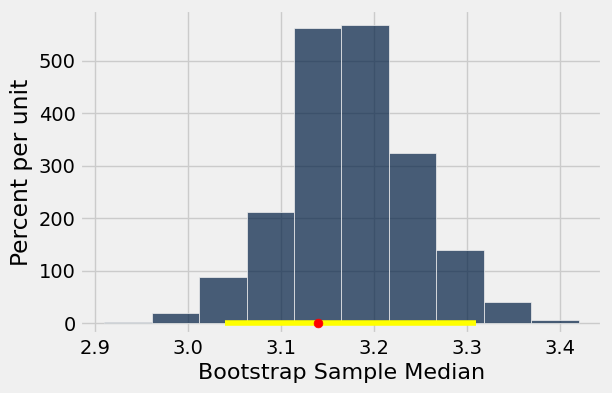

In [ ]:
# Visualize the results by drawing an `empirical histogram` of the bootstrapped medians and overlaying the confidence interval on the horizontal axis.

parameter_green = 'red'
resampled_medians.hist(bins = 10)

plt.ylim(-0.2, None)

plt.plot([left, right], [0, 0], color='yellow', lw=4, zorder=5)
plt.scatter(pop_median, 0, color=parameter_green, s=40, zorder=6);

In [ ]:
print(f"95% Confidence Interval for the PM10 Median: [{left:.2f}, {right:.2f}]")

95% Confidence Interval for the PM10 Median: [3.04, 3.31]


The 95% confidence interval for the median PM10 value is approximately [3.04, 3.31].
This means that if we repeatedly took random samples and computed the bootstrap confidence interval each time, about 95% of those intervals would contain the true population median.
In the context of air quality, this interval gives us a reliable estimate of the typical PM10 concentration across neighborhoods.

## <font color = blue size  = 5> **Task 3: Hypothesis Testing Using Confidence Intervals (1.5 Mark)**

**Task Description:**
- Test the hypothesis about the average <font color = red size =5> `pm10` </font> level in the population using confidence intervals.
  - Null Hypothesis (H0): The average pm10 level in the population is `20 μg/m³` .
  - Alternative Hypothesis (Ha): The average pm10 level in the population is not `20 μg/m³` .
- Use the confidence interval method to test this hypothesis:
Construct a 95% confidence interval for the average `pm10` level in the population.
  - If the confidence interval contains `20 μg/m³` , conclude that there is no significant difference from `20 μg/m³` (fail to reject H0).
  - Otherwise, conclude that there is a significant difference (reject H0).
- Interpret your results and explain whether the data supports the null hypothesis or the alternative hypothesis.

In [ ]:
def bootstrap_means(original_sample, num_repetitions):
    means = make_array()
    for i in np.arange(num_repetitions):
        new_bstrap_sample = original_sample.sample()
        new_bstrap_mean = np.mean(new_bstrap_sample.column('pm10'))
        means = np.append(means, new_bstrap_mean)
    return means

In [ ]:
original_sample = joined_table.sample(joined_table.num_rows * 10//100, with_replacement=False)
means = bootstrap_means(original_sample, 5000)

In [ ]:
means.sort()

In [ ]:
left = percentile(2.5, means)
left

15.654632296548785

In [ ]:
right = percentile(97.5, means)
right

16.9887669365147

In [ ]:
pop_mean = np.mean(joined_table.column('pm10'))
pop_mean

16.172319779133577

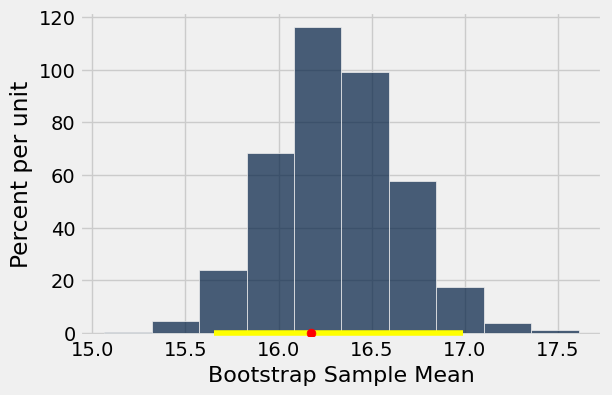

In [ ]:
parameter_green = 'red'
resampled_means = Table().with_column('Bootstrap Sample Mean', means)
resampled_means.hist(bins = 10)

plt.ylim(-0.01, None)

plt.plot([left, right], [0, 0], color='yellow', lw=4, zorder=5)
plt.scatter(pop_mean, 0, color=parameter_green, s=40, zorder=6);

In [ ]:
hypothesized_mean = 20
if left <= hypothesized_mean <= right:
    print("Fail to reject the null hypothesis.")
    print("The hypothesized mean lies within the 95% CI.")
else:
    print("Reject the null hypothesis.")
    print("The hypothesized mean falls outside the 95% CI.")


Reject the null hypothesis.
The hypothesized mean falls outside the 95% CI.


The 95% bootstrap confidence interval for the average PM10 level lies below 20 μg/m³ and does not include the hypothesized value.
Therefore, we reject the null hypothesis and conclude that the true average PM10 level in the population is significantly different from 20 μg/m³.
The data suggests that the actual pollution level is lower than 20 μg/m³.

## <font color = blue size  = 5> **Task 4: Percentiles and Extreme Values (1.5 Mark)**


- Use the bootstrap method to simulate the mean `pm10` levels for each neighborhood. Generate 5,000 bootstrap samples for the top 3 neighborhoods with the highest mean pm10 levels.
- Create an empirical histogram for each of these neighborhoods, showing the distribution of the bootstrapped means.
- Overlay horizontal yellow lines to indicate the 95% confidence interval for the mean pm10 level in each neighborhood.


In [ ]:
neighborhood_means = joined_table.group('neighborhood', np.mean)
top_3_names = neighborhood_means.sort('pm10 mean', descending=True).take(np.arange(3))
top_3_names

neighborhood,pm10 mean
Crotona Park,53.4512
Pelham Bay,34.6071
Tremont,29.829


In [ ]:
# Use the bootstrap method to simulate the mean `pm10` levels for each neighborhood. Generate 5,000 bootstrap samples for the top 3 neighborhoods with the highest mean pm10 levels.

def bootstrap_neighborhood_mean(neighborhood_name, num_repetitions=5000):
    subset = joined_table.where('neighborhood', are.equal_to(neighborhood_name))

    means = make_array()
    for _ in np.arange(num_repetitions):
        resample = subset.sample()
        mean_pm10 = np.mean(resample.column('pm10'))
        means = np.append(means, mean_pm10)
    return means


In [ ]:
bootstrap_results = {}

for name in top_3_names.column('neighborhood'):
    bootstrap_results[name] = bootstrap_neighborhood_mean(name)

<Figure size 1500x400 with 0 Axes>

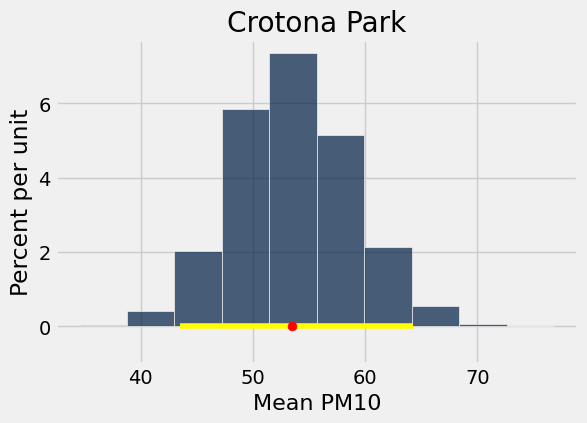

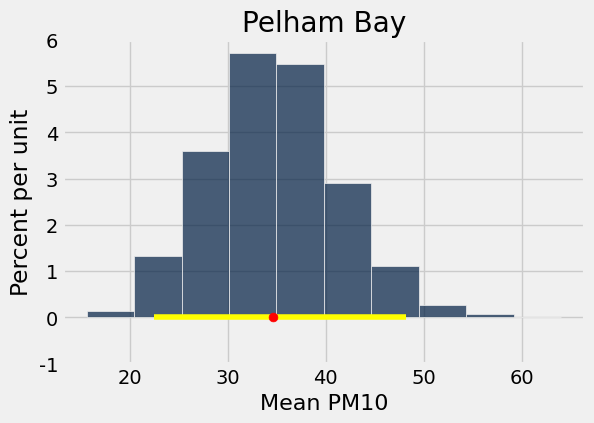

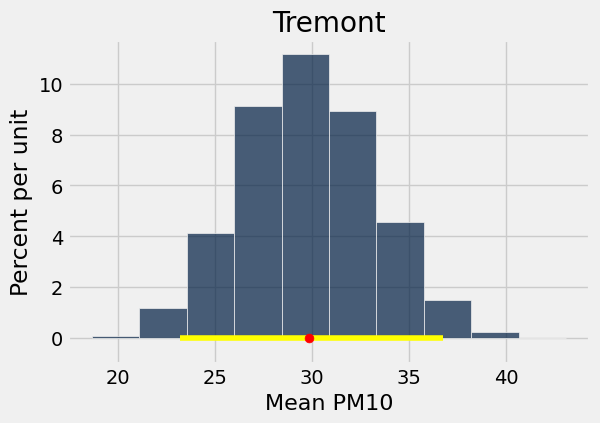

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))

for i, name in enumerate(top_3_names.column('neighborhood')):
    means = bootstrap_results[name]

    left = percentile(2.5, means)
    right = percentile(97.5, means)

    # Neighborhood-specific population mean
    local_mean = np.mean(joined_table.where('neighborhood', are.equal_to(name)).column('pm10'))

    # Plot
    Table().with_column('Bootstrap Sample Mean', means).hist(bins=10)
    plt.ylim(-0.01, None)
    plt.plot([left, right], [0, 0], color='yellow', lw=4, zorder=5)
    plt.scatter(local_mean, 0, color='red', s=40, zorder=6)
    plt.title(name)
    plt.xlabel("Mean PM10")


In [ ]:
for name in top_3_names.column('neighborhood'):
    means = bootstrap_results[name]
    ci = percentile(2.5, means), percentile(97.5, means)
    print(f"{name} 95% CI: {ci}")

Crotona Park 95% CI: (43.510792079207924, 64.241386138613862)
Pelham Bay 95% CI: (22.449999999999999, 48.224285714285713)
Tremont 95% CI: (23.217448979591836, 36.711479591836735)


# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 10, 11, and 13, for guidance on Sampling and Empirical Distributions, Testing Hypotheses,  and Estimation.
- Test your code frequently to ensure it runs without errors.